## Complete Text Processing 

### General Feature Extraction
- File loading
- Word counts
- Characters count
- Average characters per word
- Stop words count
- Count #HashTags and @Mentions
- If numeric digits are present in twitts
- Upper case word counts

### Preprocessing and Cleaning
- Lower case
- Contraction to Expansion
- Emails removal and counts
- URLs removal and counts
- Removal of RT
- Removal of Special Characters
- Removal of multiple spaces
- Removal of HTML tags
- Removal of accented characters
- Removal of Stop Words
- Conversion into base form of words
- Common Occuring words Removal
- Rare Occuring words Removal
- Word Cloud
- Spelling Correction
- Tokenization
- Lemmatization
- Detecting Entities using NER
- Noun Detection
- Language Detection
- Sentence Translation
- Using Inbuilt Sentiment Classifier

In [1]:
import pandas as pd
import numpy as np
import spacy

In [2]:
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

In [3]:
#df = pd.read_csv('../TextFiles/smsspamcollection.tsv', sep='\t')
df = pd.read_csv('twitter4000.csv', encoding = 'latin1')

In [13]:
df

,twitts,sentiment
0,is bored and wants to watch a movie any sugge...,0
1,back in miami. waiting to unboard ship,0
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0
3,ughhh i am so tired blahhhhhhhhh,0
4,@mandagoforth me bad! It's funny though. Zacha...,0
5,"brr, i'm so cold. at the moment doing my assig...",0
6,@kevinmarquis haha yep but i really need to sl...,0
7,eating some ice-cream while I try to see @pete...,0
8,@phatty84 just hella bored at work lol,0
9,Food poisoning blowssss,0


In [14]:
df['sentiment'].value_counts()

1    2000
0    2000
Name: sentiment, dtype: int64

## Word Counts

In [4]:
len('this is text'.split())

3

In [5]:
df['word_counts'] = df['twitts'].apply(lambda x: len(str(x).split()))

In [17]:
df.sample(5)

,twitts,sentiment,word_counts
3584,nice and warm,1,3
1284,Damn! It's 00:51 and I wanna be tired but I'm ...,0,11
887,i keep reading contracts as cataracts... Someo...,0,11
2377,@kemmeyer hahaha. I totally agree. I couldn't ...,1,13
729,not happy!,0,2


In [6]:
df['word_counts'].max()

32

In [7]:
df['word_counts'].min()

1

In [8]:
df[df['word_counts']==1]

,twitts,sentiment,word_counts
385,homework,0,1
691,@ekrelly,0,1
1124,disappointed,0,1
1286,@officialmgnfox,0,1
1325,headache,0,1
1897,@MCRmuffin,0,1
2542,Graduated!,1,1
2947,reading,1,1
3176,@omeirdeleon,1,1
3470,www.myspace.com/myfinalthought,1,1


# Characters Count

In [9]:
len('this is')

7

In [10]:
def char_counts(x):
    s = x.split()
    x = ''.join(s)
    return len(x)

In [11]:
char_counts('this is')

6

In [12]:
df['char_counts'] = df['twitts'].apply(lambda x: char_counts(str(x)))

In [25]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts
3158,@jamesepain np just looking for cool people t...,1,23,111
278,Listenin 2 a bunch of janet's old slow songs w...,0,21,80
1028,"Can you say sunburn? Dammit, I can. Why didn't...",0,25,88
2023,"Aw na my bad, i just can't wait to be king fro...",1,20,76
147,"yo, wtf is up with the full &amp; lite view sh...",0,16,55


## Average Word Length

In [13]:
x = 'this is' # 6/2 = 3
y = 'thankyou guys' # 12/2 = 6

In [14]:
df['avg_word_len'] = df['char_counts']/df['word_counts']

In [28]:
df.sample(4)

,twitts,sentiment,word_counts,char_counts,avg_word_len
3121,@Kakaze Can you please tell @johnrauchman how ...,1,14,67,4.785714
1349,Is Wondering How @Friendtasia Is,0,5,28,5.600000
3923,Good humor can laugh together.,1,5,26,5.200000
1844,@markhricher I was looking at a local forecast...,0,26,102,3.923077


## Stop Words Count 

In [29]:
print(stopwords)

{'somewhere', 'than', 'therefore', 'could', 'side', 'they', 'before', 'three', 'besides', 'using', 'whenever', 'about', 'nine', 'nor', 'whither', 'enough', 'should', 'along', 'third', 'wherever', 'becomes', 'does', 'has', 'into', 'either', 'part', 'becoming', 'but', 'someone', 'under', 'your', 'because', 'and', 'she', 'until', 'anyhow', 'who', 'eight', 'alone', 'beside', 'via', 'another', 'we', 'often', 'top', 'are', 'elsewhere', 'that', 'by', 'those', 'move', 'to', 'down', 'too', 'really', 'which', 'amount', 'neither', 'two', 'everything', 'therein', 'behind', 'with', 'a', 'across', 'this', 'become', 'while', 'my', 'at', 'name', 'his', 'serious', 'why', 'in', 'was', 'seems', 'herein', 'you', 'below', 'ca', 'hence', 'afterwards', 'please', 'else', 'herself', 'these', 'towards', 'through', 'hereupon', 'give', 'no', 'so', 'whole', 'will', 'beforehand', 'hundred', 'them', 'without', 'take', 'whatever', 'both', 'fifty', 'further', 'unless', 'been', 'anyone', 'the', 'others', 'sixty', 'per'

In [30]:
len(stopwords)

305

In [15]:
x = 'this is the text data'

In [16]:
x.split()

['this', 'is', 'the', 'text', 'data']

In [17]:
[t for t in x.split() if t in stopwords]

['this', 'is', 'the']

In [18]:
len([t for t in x.split() if t in stopwords])

3

In [19]:
df['stop_words_len'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t in stopwords]))

In [36]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len
83,@marcusjroberts working on a Sunday sucks don...,0,10,53,5.300000,3
2669,"@Karageorgakis To me, stop and share the music...",1,21,86,4.095238,8
3800,@tommcfly i wonder if you gonna reply me one d...,1,22,85,3.863636,13
1639,"grawr,why cant I change my picture! Haha this ...",0,25,108,4.320000,7
2699,@WindPillow i think hes my favourite,1,6,31,5.166667,2


## Count #HashTags and @Mentions 

In [20]:
x = 'this is #hashtag and this is @mention'

In [21]:
x.split()

['this', 'is', '#hashtag', 'and', 'this', 'is', '@mention']

In [22]:
[t for t in x.split() if t.startswith('@')]

['@mention']

In [23]:
len([t for t in x.split() if t.startswith('@')])

1

In [24]:
df['hashtags_count'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.startswith('#')]))

In [27]:
df['mentions_count'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.startswith('@')]))

In [28]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count
1976,@sunny525 Wasn't given that option. This is F...,0,10,52,5.200000,3,0,1
173,@likewhoaxox awwz i hate when that happens!! ...,0,18,84,4.666667,6,0,1
1939,Did Twitter temporarily disable editing whos t...,0,21,104,4.952381,8,0,0
3122,is ready for some pampering,1,5,23,4.600000,3,0,0
1128,http://twitpic.com/7oiqc - last day,0,4,32,8.000000,1,0,0


## If numeric digits are present in twitts

In [44]:
x = 'this is 1 and 2'

In [45]:
x.split()

['this', 'is', '1', 'and', '2']

In [46]:
x.split()[3].isdigit()

False

In [47]:
[t for t in x.split() if t.isdigit()]

['1', '2']

In [29]:
df['numerics_count'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.isdigit()]))

In [49]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count
2609,"going to mexican restaurant for lunch, then to...",1,27,108,4.000000,12,0,0,2
1062,@oOogabriela wat u doin my bad im mixin this s...,0,10,40,4.000000,2,0,1,0
1318,Gots Golf in the morning. I love the sport but...,0,21,75,3.571429,13,0,0,0
1224,so I need to have that I dream of Jeanie power...,0,26,111,4.269231,9,0,0,0
3250,@Donniedoll Cool!! I am already following he,1,7,38,5.428571,3,0,1,0


## UPPER case words count 

In [30]:
x = 'I AM HAPPY'
y = 'i am happy'

In [31]:
[t for t in x.split() if t.isupper()]

['I', 'AM', 'HAPPY']

In [32]:
df['upper_counts'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.isupper()]))

In [44]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts
1760,@blogrworld still need to be connected to the ...,0,20,112,5.600000,9,0,1,0,0
3525,I keep seeing twitter commercials. Hahahaa. I...,1,19,82,4.315789,8,0,0,0,2
3877,Nat and jade are walking gus. This means I hav...,1,26,107,4.115385,8,0,0,0,1
431,Making my boyfriend look different. He's cut...,0,11,57,5.181818,2,0,0,0,0
567,Argh! Sounds like someone is standing at my do...,0,22,95,4.318182,10,0,0,0,0


In [45]:
df.iloc[3962]['twitts']

'@DavidArchie Our local shows love tributes too much. True story! Will be watching SIS videos in Youtube later, haha '

# Preprocessing and Cleaning

## Lower Case Conversion 

In [46]:
x = 'this is Text'

In [47]:
x.lower()

'this is text'

In [48]:
x = 45.0
str(x).lower()

'45.0'

In [49]:
df['twitts'] = df['twitts'].apply(lambda x: str(x).lower())

In [50]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts
467,my ankles hurting! owww can't walk on it,0,8,33,4.125000,2,0,0,0,0
3412,"@samuraiox haha well, then you got a solid 8 h...",1,14,60,4.285714,4,0,1,1,0
1655,@greenxpeen lol i found out about it too late....,0,17,71,4.176471,7,0,1,0,1
3106,"i hypothesis that, guys who carry handkerchief...",1,10,51,5.100000,2,0,0,0,1
870,i don't want my friends to leave,0,7,26,3.714286,2,0,0,0,1


## Contraction to Expansion 

In [51]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how does",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
" u ": " you ",
" ur ": " your ",
" n ": " and ",
"won't": "would not",
'dis': 'this',
'bak': 'back',
'brng': 'bring'}

In [52]:
x = "i'm don't he'll" # "i am do not he will"

In [53]:
def cont_to_exp(x):
    if type(x) is str:
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x
    

In [54]:
cont_to_exp(x)

'i am do not he will'

In [55]:
%%timeit
df['twitts'] = df['twitts'].apply(lambda x: cont_to_exp(x))

61.5 ms ± 336 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [56]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts
3868,yay gamestops across the us r done and cant do...,1,25,121,4.840000,10,0,0,0,1
3680,"ok, lakers v orlando......... that should be g...",1,8,42,5.250000,3,0,0,0,0
3088,"@sklemp well, we've only been using it for a d...",1,24,106,4.416667,9,0,1,0,0
570,cannot get into mariah's new song.,0,6,28,4.666667,2,0,0,0,0
1423,@kylielovesmcfly i just got back from the vet....,0,16,76,4.750000,10,0,1,0,0


## Count and Remove Emails 

In [57]:
import re

In [58]:
df[df['twitts'].str.contains('hotmail.com')]

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts
3713,@securerecs arghh me please markbradbury_16@h...,1,5,51,10.2,0,0,1,0,0


In [59]:
df.iloc[3713]['twitts']

'@securerecs arghh me please  markbradbury_16@hotmail.com'

In [60]:
x = '@securerecs arghh me please  markbradbury_16@hotmail.com'

In [61]:
re.findall(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)', x)

['markbradbury_16@hotmail.com']

In [62]:
df['emails'] = df['twitts'].apply(lambda x: re.findall(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+\b)', x))

In [63]:
df['emails_count'] = df['emails'].apply(lambda x: len(x))

In [64]:
df[df['emails_count']>0]

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count
3713,@securerecs arghh me please markbradbury_16@h...,1,5,51,10.2,0,0,1,0,0,[markbradbury_16@hotmail.com],1


In [65]:
re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',"", x)

'@securerecs arghh me please  '

In [66]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',"", x))

In [67]:
df[df['emails_count']>0]

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count
3713,@securerecs arghh me please,1,5,51,10.2,0,0,1,0,0,[markbradbury_16@hotmail.com],1


## Count URLs and Remove it 

In [68]:
x = 'hi, thanks to watching it. for more visit https://youtube.com/kgptalkie'

In [69]:
#shh://git@git.com:username/repo.git=riif?%

In [70]:
re.findall(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', x)

[('https', 'youtube.com', '/kgptalkie')]

In [71]:
df['url_flags'] = df['twitts'].apply(lambda x: len(re.findall(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', x)))

In [72]:
df[df['url_flags']>0].sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,url_flags
1760,@blogrworld still need to be connected to the ...,0,20,112,5.600000,9,0,1,0,0,[],0,1
2499,http://twitpic.com/69jrk - the boot screen of ...,1,16,86,5.375000,3,0,0,0,2,[],0,1
1152,@stilettojungle thanks for the bracelet sale p...,0,15,97,6.466667,4,0,1,0,0,[],0,1
1458,@tracecyrus http://twitpic.com/7xor6 - the pic...,0,10,62,6.200000,4,0,1,0,0,[],0,1
648,kids asleep... but now i am pacing the floorbo...,0,13,85,6.538462,4,0,1,0,2,[],0,1


In [73]:
x

'hi, thanks to watching it. for more visit https://youtube.com/kgptalkie'

In [74]:
re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , x)

'hi, thanks to watching it. for more visit '

In [75]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , x))

In [76]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,url_flags
1130,all day i have been waiting on the was vs chi ...,0,17,61,3.588235,4,0,0,0,3,[],0,0
3868,yay gamestops across the us r done and cant do...,1,25,121,4.840000,10,0,0,0,1,[],0,0
2122,yo that girl on college hill can get the busin...,1,18,84,4.666667,8,0,0,0,0,[],0,0
3248,want to gain followers? ask #trendall to look ...,1,19,81,4.263158,9,1,0,0,0,[],0,0
658,why is no one replying to my messages?,0,8,31,3.875000,5,0,0,0,0,[],0,0


## Remove RT 

In [77]:
df[df['twitts'].str.contains('rt')]

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,url_flags
4,@mandagoforth me bad! it is funny though. zach...,0,26,116,4.461538,13,0,2,0,0,[],0,0
23,"ut oh, i wonder if the ram on the desktop is s...",0,14,46,3.285714,7,0,0,0,2,[],0,0
59,@paulmccourt dunno what sky you're looking at!...,0,15,80,5.333333,3,0,1,0,0,[],0,0
75,im back home in belfast im realli tired thoug...,0,22,84,3.818182,9,0,0,0,1,[],0,0
81,@lilmonkee987 i know what you mean... i feel s...,0,11,48,4.363636,5,0,1,0,0,[],0,0
83,@marcusjroberts working on a sunday sucks do ...,0,10,53,5.300000,3,0,1,0,0,[],0,0
84,@noxertg i saw the wolverine workprint and tho...,0,13,67,5.153846,4,0,1,0,1,[],0,0
86,i am heartbroken to say that my grandfather pa...,0,25,110,4.400000,10,0,0,0,2,[],0,0
94,not feeling as great as i did the last time i ...,0,16,59,3.687500,8,0,0,0,2,[],0,0
96,i think i am starting to get sick... piglet flu?,0,9,39,4.333333,2,0,0,0,1,[],0,0


In [78]:
x = 'rt @username: hello hirt'

In [79]:
re.sub(r'\brt\b', '', x).strip()

'@username: hello hirt'

In [80]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub(r'\brt\b', '', x).strip())

## Special Chars removal or punctuation removal 

In [81]:
df.sample(3)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,url_flags
2124,ahhhhh i love the bay,1,5,17,3.400000,1,0,0,0,1,[],0,0
1914,@ninjafrog5 i have had another blood nose &amp...,0,14,60,4.285714,6,0,1,0,0,[],0,0
2276,@hibiscuit any of your decisions is a good one...,1,14,63,4.500000,7,0,1,0,0,[],0,0


In [82]:
x = '@duyku apparently i was not ready enough... i...'

In [83]:
re.sub(r'[^\w ]+', "", x)

'duyku apparently i was not ready enough i'

In [84]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub(r'[^\w ]+', "", x))

In [85]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,url_flags
3366,wwwbigbaldhead hey how are you doing love your...,1,19,89,4.684211,11,0,1,0,0,[],0,0
2058,bonnieswansong i do it reluctantly if i do not...,1,24,103,4.291667,10,0,1,0,2,[],0,0
2612,dannynic hola barrow we are in las palmas gran...,1,22,94,4.272727,9,0,1,0,1,[],0,0
3337,guess what im doing watching bof woohoooo,1,7,37,5.285714,1,0,0,0,0,[],0,0
141,rowdyeh its not there anymore,0,5,26,5.200000,3,0,1,0,0,[],0,0


## Remove multiple spaces `"hi   hello    "`

In [86]:
x =  'hi    hello     how are you'

In [87]:
' '.join(x.split())

'hi hello how are you'

In [88]:
df['twitts'] = df['twitts'].apply(lambda x: ' '.join(x.split()))

## Remove HTML tags

In [95]:
#!pip install beautifulsoup4

In [105]:
from bs4 import BeautifulSoup

In [106]:
x = '<html><h1> thanks for watching it </h1></html>'

In [107]:
x.replace('<html><h1>', '').replace('</h1></html>', '') #not rec

' thanks for watching it '

In [108]:
!pip install lxml

In [109]:
!pip install html5lib

In [112]:
BeautifulSoup(x, 'html.parser').get_text().strip()

'thanks for watching it'

In [113]:
%%time
df['twitts'] = df['twitts'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text().strip())

CPU times: user 133 ms, sys: 26.5 ms, total: 159 ms
Wall time: 159 ms


## Remove Accented Chars 

In [114]:
x = 'Áccěntěd těxt'

In [115]:
import unicodedata

In [116]:
def remove_accented_chars(x):
    x = unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return x

In [117]:
remove_accented_chars(x)

'Accented text'

In [118]:
df['twitts'] = df['twitts'].apply(lambda x: remove_accented_chars(x))

## Remove Stop Words 

In [9]:
x = 'this is a stop words'

In [10]:
' '.join([t for t in x.split() if t not in stopwords])

NameError: name 'stopwords' is not defined

In [11]:
df['twitts_no_stop'] = df['twitts'].apply(lambda x: ' '.join([t for t in x.split() if t not in stopwords]))

NameError: name 'df' is not defined

In [12]:
df.sample(5)

NameError: name 'df' is not defined

## Convert into base or root form of word 

In [8]:
nlp = spacy.load('en_core_web_sm')

NameError: name 'spacy' is not defined

In [124]:
x = 'this is chocolates. what is times? this balls'

In [125]:
def make_to_base(x):
    x = str(x)
    x_list = []
    doc = nlp(x)
    
    for token in doc:
        lemma = token.lemma_
        if lemma == '-PRON-' or lemma == 'be':
            lemma = token.text

        x_list.append(lemma)
    return ' '.join(x_list)

In [126]:
make_to_base(x)

'this is chocolate . what is time ? this ball'

In [127]:
df['twitts'] = df['twitts'].apply(lambda x: make_to_base(x))

In [128]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,url_flags,twitts_no_stop
2101,tree183 i do i read the book too i share the s...,1,26,108,4.153846,6,0,1,0,4,[],0,0,tree183 read book share sentiment bout foxes t...
3354,my payslip always go to my junk foldersuperb f...,1,15,80,5.333333,6,0,0,0,0,[],0,0,payslip goes junk foldersuperb filtering rainb...
3473,just back home from a little gathering with so...,1,19,87,4.578947,9,0,0,0,0,[],0,0,home little gathering old friends fun
436,thfanvee same here who win,0,5,24,4.800000,3,0,1,0,0,[],0,0,thfanvee won
1354,have a head ache and have to go to work,0,10,31,3.100000,7,0,0,0,0,[],0,0,head ache work


## Common words removal 

In [129]:
x = 'this is this okay bye'

In [130]:
text = ' '.join(df['twitts'])

In [131]:
len(text)

273716

In [132]:
text = text.split()

In [133]:
len(text)

54242

In [134]:
freq_comm = pd.Series(text).value_counts()

In [135]:
f20 = freq_comm[:20]

In [136]:
f20

i       2531
to      1461
the     1299
a        957
you      896
not      894
is       880
my       825
it       735
and      733
have     693
do       618
in       571
for      521
of       482
go       480
am       472
that     458
get      448
me       432
dtype: int64

In [ ]:
df['twitts'] = df['twitts'].apply(lambda x: ' '.join([t for t in x.split() if t not in f20]))

In [ ]:
df.sample(5)

## Rare words removal 

In [137]:
rare20 = freq_comm.tail(20)

In [138]:
df['twitts'] = df['twitts'].apply(lambda x: ' '.join([t for t in x.split() if t not in rare20]))

In [139]:
df.sample(5)

,twitts,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_count,mentions_count,numerics_count,upper_counts,emails,emails_count,url_flags,twitts_no_stop
680,damarques johnson vs james wilkes show heart a...,0,20,106,5.300000,5,0,0,0,2,[],0,0,damarques johnson vs james wilkes showed heart...
3234,watch greys anatomyo how i love mcdreamy and m...,1,9,51,5.666667,2,0,0,0,1,[],0,0,watching greys anatomyo love mcdreamy mcsteamy
2330,i find 20 on the ground at an intersection wha...,1,13,50,3.846154,5,0,0,0,1,[],0,0,found 20 ground intersection lucky day
3513,meekymadness come to macq with me i am catch t...,1,12,53,4.416667,4,0,1,1,0,[],0,0,meekymadness come macq catching 10 train
997,spedi have leave the jungle that mean no more ...,0,16,68,4.250000,8,0,0,0,1,[],0,0,spedi left jungle means drama worth watching s


## Word Cloud Visualization 

In [141]:
#!pip install wordcloud

    100% |████████████████████████████████| 225kB 4.1MB/s ta 0:00:01
    100% |████████████████████████████████| 3.0MB 10.0MB/s ta 0:00:01
  Running setup.py bdist_wheel for wordcloud ... done
  Stored in directory: /Users/harmeetbhatia/Library/Caches/pip/wheels/bf/18/33/c6d0e1bb532e0587da731a02d990e62c483c8e49741e0c4bf3
Successfully built wordcloud


In [142]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In /Users/harmeetbhatia/opt/anaconda3/envs/nlp_course/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/harmeetbhatia/opt/anaconda3/envs/nlp_course/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/harmeetbhatia/opt/anaconda3/envs/nlp_course/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [143]:
text = ' '.join(df['twitts'])

In [144]:
len(text)

273539

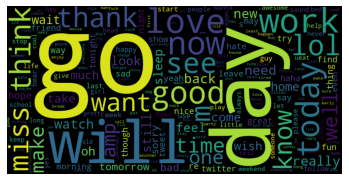

In [145]:
wc = WordCloud(width=800, height=400).generate(text)
plt.imshow(wc)
plt.axis('off')
plt.show()

## Spelling Correction 

In [146]:
#!pip install -U textblob

    100% |████████████████████████████████| 645kB 6.5MB/s ta 0:00:011
  Found existing installation: textblob 0.15.3
    Uninstalling textblob-0.15.3:
      Successfully uninstalled textblob-0.15.3


In [ ]:
#!conda install -c conda-forge textblob
#!python -m textblob.download_corpora

Solving environment: done

## Package Plan ##

  environment location: /Users/harmeetbhatia/opt/anaconda3/envs/nlp_course

  added / updated specs:
    - textblob


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    textblob-0.15.3            |             py_0         595 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         595 KB

The following NEW packages will be INSTALLED:

  textblob           conda-forge/noarch::textblob-0.15.3-py_0


Proceed ([y]/n)? 

In [1]:
from textblob import TextBlob

In [2]:
x = 'thankks forr waching it'

In [3]:
x = TextBlob(x).correct()

In [4]:
x

TextBlob("thanks for watching it")

## Tokenization using TextBlob


In [5]:
x = 'thanks#watching this video. please like it'

In [6]:
TextBlob(x).words

WordList(['thanks', 'watching', 'this', 'video', 'please', 'like', 'it'])

In [7]:
doc = nlp(x)
for token in doc:
    print(token)

NameError: name 'nlp' is not defined

## Detecting Nouns 

In [161]:
x = 'Breaking News: Donald Trump, the president of the USA is looking to sign a deal to mine the moon'

In [162]:
doc = nlp(x)

In [163]:
for noun in doc.noun_chunks:
    print(noun)

Breaking News
Donald Trump
the president
the USA
a deal
the moon


## Language Translation and Detection

Language Code: https://www.loc.gov/standards/iso639-2/php/code_list.php

In [164]:
x

'Breaking News: Donald Trump, the president of the USA is looking to sign a deal to mine the moon'

In [165]:
tb = TextBlob(x)

In [160]:
tb.detect_language()

HTTPError: HTTP Error 400: Bad Request

In [ ]:
tb.translate(to = 'zh')

## Use TextBlob's Inbuilt Sentiment Classifier 

In [ ]:
from textblob.sentiments import NaiveBayesAnalyzer

In [ ]:
x = 'we all stands together. we are gonna win this fight'

In [ ]:
tb = TextBlob(x, analyzer=NaiveBayesAnalyzer())

In [ ]:
tb.sentiment